## Import data and inspect

In [1]:
import matplotlib
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
train_df.shape

(8693, 14)

In [4]:
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [5]:
train_df.head()



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Clean data

In [7]:
train_df[['Cabin', 'Transported']].groupby('Cabin').mean()

,Transported
Cabin,
A/0/P,0.5
A/0/S,0.0
A/1/S,1.0
A/10/P,0.0
A/10/S,1.0
...,...
T/0/P,0.0
T/1/P,0.0
T/2/P,0.0


*Isolate cabin letter*

In [9]:
train_df['Cabin'].str.split(pat="/")

0          [B, 0, P]
1          [F, 0, S]
2          [A, 0, S]
3          [A, 0, S]
4          [F, 1, S]
            ...     
8688      [A, 98, P]
8689    [G, 1499, S]
8690    [G, 1500, S]
8691     [E, 608, S]
8692     [E, 608, S]
Name: Cabin, Length: 8693, dtype: object

In [14]:
train_df["cabin_no"] = train_df["Cabin"].str[0]

In [16]:
train_df["cabin_no"]

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: cabin_no, Length: 8693, dtype: object

<AxesSubplot:xlabel='cabin_no'>

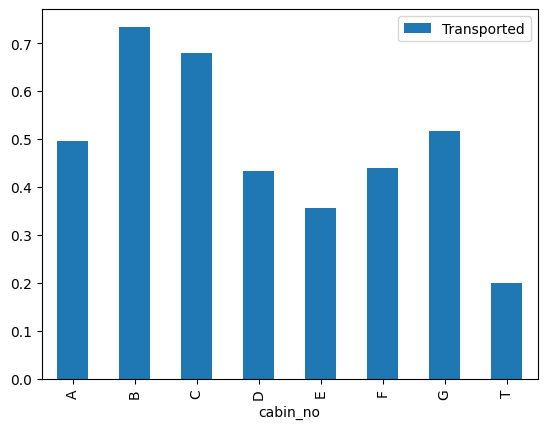

In [17]:
train_df[['cabin_no', 'Transported']].groupby('cabin_no').mean().plot(kind = 'bar')

*Impute null values*

In [22]:
(train_df.isna().sum()/len(train_df)).sort_values(ascending = False)

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Name            0.023007
Cabin           0.022892
cabin_no        0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
PassengerId     0.000000
Transported     0.000000
dtype: float64

In [30]:
train_df_tobeimputed = train_df.drop(['PassengerId', 'Transported', 'cabin_no'], axis =1)
    

In [31]:
train_df_tobeimputed.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [35]:
from sklearn.impute import SimpleImputer
for column in train_df_tobeimputed:
    simple_imputer = SimpleImputer(strategy = "most_frequent")
    simple_imputer.fit(train_df_tobeimputed[[column]])
    train_df[[column]] = simple_imputer.transform(train_df_tobeimputed[[column]])
    

In [37]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_no
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F


In [38]:
(train_df.isna().sum()/len(train_df)).sort_values(ascending = False)

cabin_no        0.022892
PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Cabin           0.000000
Destination     0.000000
Age             0.000000
VIP             0.000000
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            0.000000
Transported     0.000000
dtype: float64

## Encoding data and target

In [39]:
X = train_df.drop(columns='Transported')
y = train_df['Transported']